# Lab 2: NLP para Cibeseguridad

## Camilo A. Martínez, Daniel Rambaut


In [ ]:
# !pip install transformers[sentencepiece]
# !pip install emoji
# !pip install xlsxwriter
# !pip install gensim

In [4]:
import os # The OS module in Python provides a way of using operating system dependent functionality
import pandas as pd # Read data from file

## 1. Gathering

Dado el momento crucial de las elecciones presidenciales de 2022 en Colombia, se propone trabajar sobre información que tenga que ver con el candidato Gustavo Petro, ya que este fue amenazado por un grupo paramilitar y su vida corre riesgo.

- **Motivo:** Existen diversos grupos que NO muestran afinidad con el candidato mencionado. Dentro de estos grupos encontramos grupos políticos con con una tendencia politica opuesta, grupos paramilitares, grupos empresariales, empresarios, periodistas, entre otros. Algunas de estas organizaciones estan en total desacuerdo, por diversas razones, con una eventual llegada a la presidencia de Petro, por lo que se ven campañas de desprestigio contra este candidato. Ademas existen rumores de planes para asesinarlo.

- **Oportunidad:** El candidato Petro puede tener vulneravilidades en su esquema de seguridad, personas infiltradas en su campaña, infraestructura cibernética con vulnerabilidades, entre otras.

- **Medio:**: Distintos tipos de personas pueden ser instrumentalizadas para cometer delitos cibernéticos (promoción del odio, desprestigio, hackeo, manipulacion de la informacion), o incluso ataques físicos ya sea a personas o lugares o espacios de campaña.

Para la busqueda sde información se uso la herramienta TAGS para recopilar tweets durante
a un intervalo de 7 días. Este intervalo esta limitado por la aplicacion.

Los parametros de busqueda usados fueron:

- Enter term: petro
- Period: -7
- Follower count filter:	10
- Number of tweets:	18000
- Type:	search/tweets

Con estos argumentos se logró recopilar 17244 tweets, durante las fechas de 06/05/2022 23:06:27 y 07/05/2022 00:59:59.

Se usó el término de busqueda `petro` para recopilar suficientes tweets. Búsquedas con otro tipo de términos arrojaban pocos tweets. Como la búsqueda se hace con este sencillo y general término, esta puede generar spam, asi que establecemos un número mínimo de seguidores que una persona debe tener para ser incluida en el archivo. En este caso usamos de manera empírica 10.






## 2. Data

In [ ]:
filepath = 'TAGS_petro.xlsx'
data = pd.read_excel(filepath,sheet_name="Archive") # Importing the database (tweets)

In [ ]:
data.head() # Returns the first rows of the database

id_str      from_user  \
0  1522727911144534016    elanticrocs   
1  1522727907768025089        gduquej   
2  1522727907101220867  Artemis909090   
3  1522727906073583623        Jahpal3   
4  1522727906014814210    javipatino1   

                                                text  \
0  @BarbasTattoo Yo no me amargó ; no ando en esa...   
1  RT @AlvaroUribeVel: La violencia asesina, dest...   
2  @natiibedoya No sabe si no hablar de Petro hab...   
3  RT @jarizabaletaf: Analicen los últimos trinos...   
4  RT @Danielbricen: 4. Gustavo Petro no es capaz...   

                       created_at                time  geo_coordinates  \
0  Fri May 06 23:59:59 +0000 2022 2022-05-07 00:59:59              NaN   
1  Fri May 06 23:59:58 +0000 2022 2022-05-07 00:59:58              NaN   
2  Fri May 06 23:59:58 +0000 2022 2022-05-07 00:59:58              NaN   
3  Fri May 06 23:59:58 +0000 2022 2022-05-07 00:59:58              NaN   
4  Fri May 06 23:59:58 +0000 2022 2022-05-07 00:59:58              NaN   

   user_lang  in_reply_to_user_id_str in_reply_to_screen_name  \
0        NaN              559273833.0            BarbasTattoo   
1        NaN                      NaN                     NaN   
2        NaN              159950603.0             natiibedoya   
3        NaN                      NaN                     NaN   
4        NaN                      NaN                     NaN   

      from_user_id_str  in_reply_to_status_id_str  \
0  1496925076507217921               1.522724e+18   
1            782667746                        NaN   
2  1462433108947615747               1.522679e+18   
3  1392526359524745222                        NaN   
4           1055404028                        NaN   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/iphone" r...   

                                   profile_image_url  user_followers_count  \
0  http://pbs.twimg.com/profile_images/1498042104...                  1096   
1  http://pbs.twimg.com/profile_images/2547046566...                  1678   
2  http://abs.twimg.com/sticky/default_profile_im...                    26   
3  http://pbs.twimg.com/profile_images/1392526728...                    15   
4  http://pbs.twimg.com/profile_images/1005521337...                  1752   

   user_friends_count user_location  \
0              2027.0           NaN   
1              1938.0           NaN   
2                99.0           NaN   
3                53.0           NaN   
4              2703.0           NaN   

                                          status_url  \
0  http://twitter.com/elanticrocs/statuses/152272...   
1  http://twitter.com/gduquej/statuses/1522727907...   
2  http://twitter.com/Artemis909090/statuses/1522...   
3  http://twitter.com/Jahpal3/statuses/1522727906...   
4  http://twitter.com/javipatino1/statuses/152272...   

                                        entities_str  
0  {"hashtags":[],"symbols":[],"user_mentions":[{...  
1  {"hashtags":[],"symbols":[],"user_mentions":[{...  
2  {"hashtags":[],"symbols":[],"user_mentions":[{...  
3  {"hashtags":[],"symbols":[],"user_mentions":[{...  
4  {"hashtags":[],"symbols":[],"user_mentions":[{...

In [ ]:
# converting to list the column "text" where it contains the tweets
cols = ['from_user', 'text']
text = data[cols].values.tolist()

In [ ]:
text # printing the tweets

[['elanticrocs',
  '@BarbasTattoo Yo no me amargó ; no ando en esas dinámicas ; salgo converso con amigos y vecinos y trato de conseguir votos para Gustavo Petro presidente en primera vuelta y Francia Marquez vicepresidenta'],
 ['gduquej',
  'RT @AlvaroUribeVel: La violencia asesina, destruye la familia con el microtráfico y exige votar por Petro. Vuelve y juega'],
 ['Artemis909090',
  '@natiibedoya No sabe si no hablar de Petro hable de las.propuestas de Rico y de los beneficios bde Duque para el país'],
 ['Jahpal3',
  'RT @jarizabaletaf: Analicen los últimos trinos de Petro, un ganador no tendría esa actitud.\n\nEstá desquiciado porque sabe que se aproxima su tercera derrota'],
 ['javipatino1',
  'RT @Danielbricen: 4. Gustavo Petro no es capaz de decir que Hugo Chávez fue un dictador. https://t.co/zUA8Un0iJ5'],
 ['Stephy3pa',
  'RT @OLGUIN_MAYORGA: #ATENCIÓN Hoy Nuevamente es recibido en pista del Aeropuerto de Cúcuta, Gustavo Petro, por el excomandante de la FARC Rubén Zamora, frent

In [ ]:
text[0][0] # accessing to the first tweet from the list 'text'

'elanticrocs'

In [ ]:
len(text) # number of tweets

17244

In [ ]:
tweets = [text[i][1] for i in range(len(text))]
tweets
len(tweets) # length of tweets

17244

In [ ]:
users = [text[i][0] for i in range(len(text))]
users
len(users) # length of users

17244

## 3. Data Preparation

- ## Functions to remove URL links, @mention, #hashtags

In [ ]:
import string # String contains methods that allow the use of characters which are considered punctuation characters, 
                # digits, uppercase, lowercase, etc.
import re # Regular expression operations

In [ ]:
def strip_links(text): # function to remove/strip URL links
    link_regular_expression = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regular_expression, text)
    for link in links:
        text = text.replace(link[0], ', ')   
    return text

In [ ]:
def strip_all_entities(text): # function to remove/strip mentions, hashtags, characters from some users
    entity_prefixes = ['@','#','\\','_']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

source: https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression

In [ ]:
def strip_all(list_text): # function that removes all URL links, @mention, #hashtags
    list_stripped = []
    for t in list_text:
        word = strip_all_entities(strip_links(t))
        list_stripped.append(word)
    return(list_stripped)

In [ ]:
tweets = strip_all([text[i][1] for i in range(len(text))])
text = [[users[i],tweets[i]] for i in range(len(users))]
text

[['elanticrocs',
  'Yo no me amargó no ando en esas dinámicas salgo converso con amigos y vecinos y trato de conseguir votos para Gustavo Petro presidente en primera vuelta y Francia Marquez vicepresidenta'],
 ['gduquej',
  'RT La violencia asesina destruye la familia con el microtráfico y exige votar por Petro Vuelve y juega'],
 ['Artemis909090',
  'No sabe si no hablar de Petro hable de las propuestas de Rico y de los beneficios bde Duque para el país'],
 ['Jahpal3',
  'RT Analicen los últimos trinos de Petro un ganador no tendría esa actitud Está desquiciado porque sabe que se aproxima su tercera derrota'],
 ['javipatino1',
  'RT 4 Gustavo Petro no es capaz de decir que Hugo Chávez fue un dictador'],
 ['Stephy3pa',
  'RT Hoy Nuevamente es recibido en pista del Aeropuerto de Cúcuta Gustavo Petro por el excomandante de la FARC Rubén Zamora frente 33 Quienes se atribuyeron el atentado en Bogotá donde mueren los dos niños días atrás RT'],
 ['sergio_robledo1', 'RT Lo dijo Petro hace más 

- ## Function to convert tweets in lowercase

In [ ]:
def lower_case(list_text): # Convert lowercase tweets for language processing
    list_lower_case = []
    for i in list_text:
        word = i.strip()
        new_word = word.lower()
        list_lower_case.append(new_word)
    return(list_lower_case)

In [ ]:
tweets = lower_case([text[i][1] for i in range(len(text))])
text = [[users[i],tweets[i]] for i in range(len(users))]
text

[['elanticrocs',
  'yo no me amargó no ando en esas dinámicas salgo converso con amigos y vecinos y trato de conseguir votos para gustavo petro presidente en primera vuelta y francia marquez vicepresidenta'],
 ['gduquej',
  'rt la violencia asesina destruye la familia con el microtráfico y exige votar por petro vuelve y juega'],
 ['Artemis909090',
  'no sabe si no hablar de petro hable de las propuestas de rico y de los beneficios bde duque para el país'],
 ['Jahpal3',
  'rt analicen los últimos trinos de petro un ganador no tendría esa actitud está desquiciado porque sabe que se aproxima su tercera derrota'],
 ['javipatino1',
  'rt 4 gustavo petro no es capaz de decir que hugo chávez fue un dictador'],
 ['Stephy3pa',
  'rt hoy nuevamente es recibido en pista del aeropuerto de cúcuta gustavo petro por el excomandante de la farc rubén zamora frente 33 quienes se atribuyeron el atentado en bogotá donde mueren los dos niños días atrás rt'],
 ['sergio_robledo1', 'rt lo dijo petro hace más 

- ## Replace the emojis for their names

In [ ]:
import emoji # Emoji codes

In [ ]:
def replace_name_emoji(list_text): # function that replaces emoticons by their names
    list_name_emoji = []
    for l in list_text:
        name_emoji = emoji.demojize(l, delimiters=(' ', ' '))
        list_name_emoji.append(name_emoji) 
    return(list_name_emoji)

In [ ]:
tweets = replace_name_emoji([text[i][1] for i in range(len(text))])
tweets = [tweets[i].replace("_"," ") for i in range(len(tweets))]
text = [[users[i],tweets[i]] for i in range(len(users))]
text

[['elanticrocs',
  'yo no me amargó no ando en esas dinámicas salgo converso con amigos y vecinos y trato de conseguir votos para gustavo petro presidente en primera vuelta y francia marquez vicepresidenta'],
 ['gduquej',
  'rt la violencia asesina destruye la familia con el microtráfico y exige votar por petro vuelve y juega'],
 ['Artemis909090',
  'no sabe si no hablar de petro hable de las propuestas de rico y de los beneficios bde duque para el país'],
 ['Jahpal3',
  'rt analicen los últimos trinos de petro un ganador no tendría esa actitud está desquiciado porque sabe que se aproxima su tercera derrota'],
 ['javipatino1',
  'rt 4 gustavo petro no es capaz de decir que hugo chávez fue un dictador'],
 ['Stephy3pa',
  'rt hoy nuevamente es recibido en pista del aeropuerto de cúcuta gustavo petro por el excomandante de la farc rubén zamora frente 33 quienes se atribuyeron el atentado en bogotá donde mueren los dos niños días atrás rt'],
 ['sergio_robledo1', 'rt lo dijo petro hace más 

## 4. Translation

In [ ]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device 

'cuda:0'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-es-en").to(device)

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/783k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:196: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

In [ ]:
sample_text = "esto es una prueba de un modelo de traducción español a inglés"

batch = tokenizer([sample_text], return_tensors="pt").to(device)

generated_ids = model.generate(**batch)
tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

'This is a proof of a Spanish to English translation model.'

In [ ]:
tweets = [text[i][1] for i in range(len(text))]
tweets

['yo no me amargó no ando en esas dinámicas salgo converso con amigos y vecinos y trato de conseguir votos para gustavo petro presidente en primera vuelta y francia marquez vicepresidenta',
 'rt la violencia asesina destruye la familia con el microtráfico y exige votar por petro vuelve y juega',
 'no sabe si no hablar de petro hable de las propuestas de rico y de los beneficios bde duque para el país',
 'rt analicen los últimos trinos de petro un ganador no tendría esa actitud está desquiciado porque sabe que se aproxima su tercera derrota',
 'rt 4 gustavo petro no es capaz de decir que hugo chávez fue un dictador',
 'rt hoy nuevamente es recibido en pista del aeropuerto de cúcuta gustavo petro por el excomandante de la farc rubén zamora frente 33 quienes se atribuyeron el atentado en bogotá donde mueren los dos niños días atrás rt',
 'rt lo dijo petro hace más de una semana…',
 'rt petro formaba parte del m 19 cuando esa organización terrorista tomó por asalto al palacio de justicia e

In [ ]:
test_tweets = []

character_count = 0
translated_tweets = 0

for f in tweets:
    batch = tokenizer([f], return_tensors="pt").to(device)
    generated_ids = model.generate(**batch)
    tweet_translated = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    test_tweets.append(tweet_translated)
    
    translated_tweets += 1
    character_count += len(f)
    pp = (translated_tweets/len(tweets))*100
    if translated_tweets%100 == 0:
        print(round(pp,2), '%')

0.58 %
1.16 %
1.74 %
2.32 %
2.9 %
3.48 %
4.06 %
4.64 %
5.22 %
5.8 %
6.38 %
6.96 %
7.54 %
8.12 %
8.7 %
9.28 %
9.86 %
10.44 %
11.02 %
11.6 %
12.18 %
12.76 %
13.34 %
13.92 %
14.5 %
15.08 %
15.66 %
16.24 %
16.82 %
17.4 %
17.98 %
18.56 %
19.14 %
19.72 %
20.3 %
20.88 %
21.46 %
22.04 %
22.62 %
23.2 %
23.78 %
24.36 %
24.94 %
25.52 %
26.1 %
26.68 %
27.26 %
27.84 %
28.42 %
29.0 %
29.58 %
30.16 %
30.74 %
31.32 %
31.9 %
32.48 %
33.05 %
33.63 %
34.21 %
34.79 %
35.37 %
35.95 %
36.53 %
37.11 %
37.69 %
38.27 %
38.85 %
39.43 %
40.01 %
40.59 %
41.17 %
41.75 %
42.33 %
42.91 %
43.49 %
44.07 %
44.65 %
45.23 %
45.81 %
46.39 %
46.97 %
47.55 %
48.13 %
48.71 %
49.29 %
49.87 %
50.45 %
51.03 %
51.61 %
52.19 %
52.77 %
53.35 %
53.93 %
54.51 %
55.09 %
55.67 %
56.25 %
56.83 %
57.41 %
57.99 %
58.57 %
59.15 %
59.73 %
60.31 %
60.89 %
61.47 %
62.05 %
62.63 %
63.21 %
63.79 %
64.37 %
64.95 %
65.53 %
66.11 %
66.69 %
67.27 %
67.85 %
68.43 %
69.01 %
69.59 %
70.17 %
70.75 %
71.33 %
71.91 %
72.49 %
73.07 %
73.65 %
74.23 %
74.8

In [ ]:
print("Total characters translated: {0}".format(character_count))
print("Translated Tweets: {0}".format(translated_tweets))

Total characters translated: 2681767
Translated Tweets: 17244


In [ ]:
text = [[users[i],test_tweets[i]] for i in range(len(users))]
text

[['elanticrocs',
  "I didn't tie myself up not going in those dynamics I go out with friends and neighbors and try to get votes for petro-like president in first round and france marquez vice president"],
 ['gduquej',
  'rt murderous violence destroys the family with microtrafficking and demands to vote for petro comes back and plays'],
 ['Artemis909090',
  "he doesn't know if not to talk about petro talk about the proposals of rich and the benefits bde duke for the country"],
 ['Jahpal3',
  "rt analyze the last petro trills a winner wouldn't have that attitude is deranged because he knows his third defeat is approaching"],
 ['javipatino1',
  'rt 4 petro gustavo is not able to say that hugo chávez was a dictator'],
 ['Stephy3pa',
  'rt is again received on the runway of the airport of cucuta gustavo petro by the former commander of the farc rubén zamora front 33 who were attributed the attack in Bogota where the two children die days ago rt'],
 ['sergio_robledo1', 'Rt said petro more t

In [ ]:
len(text)

17244

In [ ]:
text[0][1] # first translated tweet

"I didn't tie myself up not going in those dynamics I go out with friends and neighbors and try to get votes for petro-like president in first round and france marquez vice president"

In [ ]:
# exporting translated tweets
base = pd.DataFrame(text, columns=["users","tweets"])
base.to_excel('test.xlsx')

## 5. Additional Text Cleaning

- ## Delete blank rows

In [ ]:
df = pd.read_excel("test.xlsx")
df.to_string(index=False)
nan_value = float("nan")

df.replace("", nan_value, inplace=True)

df.dropna(subset = ["tweets"], inplace=True)
df.reset_index(drop=True, inplace=True) 

df.head()

Unnamed: 0          users  \
0           0    elanticrocs   
1           1        gduquej   
2           2  Artemis909090   
3           3        Jahpal3   
4           4    javipatino1   

                                              tweets  
0  I didn't tie myself up not going in those dyna...  
1  rt murderous violence destroys the family with...  
2  he doesn't know if not to talk about petro tal...  
3  rt analyze the last petro trills a winner woul...  
4  rt 4 petro gustavo is not able to say that hug...

In [ ]:
df.shape

(17242, 3)

In [ ]:
def write_excel(tab,name):
    writer = pd.ExcelWriter(name+'.xlsx', engine='xlsxwriter')
    # Convert the dataframe to an XlsxWriter Excel object.
    tab.to_excel(writer, sheet_name='Sheet1',index=False)
    # Close the Pandas Excel writer and output the Excel file.
    writer.save()


In [ ]:
cols = ['users', 'tweets']
df_eng = df[cols]
df_eng.head()

users                                             tweets
0    elanticrocs  I didn't tie myself up not going in those dyna...
1        gduquej  rt murderous violence destroys the family with...
2  Artemis909090  he doesn't know if not to talk about petro tal...
3        Jahpal3  rt analyze the last petro trills a winner woul...
4    javipatino1  rt 4 petro gustavo is not able to say that hug...

In [ ]:
write_excel(df_eng, 'users_tweets_eng')

## 6. Load Text Cleaned

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dff = pd.read_excel("users_tweets_eng.xlsx")
dff.head()

users                                             tweets
0    elanticrocs  I didn't tie myself up not going in those dyna...
1        gduquej  rt murderous violence destroys the family with...
2  Artemis909090  he doesn't know if not to talk about petro tal...
3        Jahpal3  rt analyze the last petro trills a winner woul...
4    javipatino1  rt 4 petro gustavo is not able to say that hug...

In [3]:
cols = ['users', 'tweets']
df_eng = dff[cols]
df_eng.head()

users                                             tweets
0    elanticrocs  I didn't tie myself up not going in those dyna...
1        gduquej  rt murderous violence destroys the family with...
2  Artemis909090  he doesn't know if not to talk about petro tal...
3        Jahpal3  rt analyze the last petro trills a winner woul...
4    javipatino1  rt 4 petro gustavo is not able to say that hug...

In [4]:
text = df_eng.values.tolist()
text
len(text)

17242

In [5]:
tweets = [text[i][1] for i in range(len(text))]
len(tweets)

17242

In [6]:
users = [text[i][0] for i in range(len(text))]
len(users)

17242

In [7]:
test_tweets = df_eng['tweets'].tolist()

## 7. Word Embedding

In [8]:
import gensim

#wv_embedding is the embedding loaded
wv_embeddings = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=500000)
type(wv_embeddings )


gensim.models.keyedvectors.KeyedVectors

### From word to text embedding

In [9]:
#This function converts a question in a vector
import numpy as np
def tweets_to_vec(tweet, embeddings, dim=300):

    result = np.zeros(dim) #300 dimensional vector for phrase vector
    cnt = 0
    words = tweet.split()
    for word in words: #All word vectors composing the phrase are summed
        if word in embeddings:
            result += np.array(embeddings[word])
            cnt += 1
    if cnt != 0: #This would happen if no word was found in the embedding
        result /= cnt
    return result

In [11]:
tweets2vec = []
for tweet in test_tweets:
    tweet = tweet.strip()
    answer = tweets_to_vec(tweet, wv_embeddings)
    tweets2vec.append(answer)

In [12]:
tweets2vec

[array([ 4.81341327e-02, -1.19990596e-02,  7.08098235e-02,  9.98456037e-02,
        -3.41887297e-02, -5.79065394e-02,  7.01565213e-03, -1.11234312e-01,
         5.37018953e-02,  3.41506534e-02, -4.91813377e-02, -1.15347403e-01,
        -5.34622758e-02,  1.03194625e-02, -9.30677343e-02,  7.35767506e-02,
         1.10052038e-01,  9.04134115e-02,  4.13547092e-02, -6.14657932e-02,
        -3.56716580e-02,  6.53844763e-02,  7.21039949e-02, -3.72924805e-02,
         4.05262135e-02, -3.42124656e-02, -1.18876704e-01, -7.43046513e-03,
        -1.41104239e-02, -1.96442781e-02,  1.02231061e-02,  7.55570023e-02,
        -5.41336625e-02, -3.53144893e-02,  3.34020544e-02,  4.02238634e-02,
         1.14321532e-02,  3.55586299e-03,  4.41662824e-02,  9.97879593e-02,
         1.17838542e-01, -8.65455910e-02,  1.17684823e-01,  4.12326389e-03,
        -5.55010195e-02,  3.26775445e-02,  7.59096499e-03, -4.23154478e-02,
         2.54313151e-04,  6.92824611e-02, -2.51792625e-02,  9.10780165e-02,
         2.0

In [13]:
len(tweets2vec)

17242

## 8. Cosine similarity 

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
cosines = cosine_similarity(tweets2vec)

In [16]:
cosines

array([[1.        , 0.57276428, 0.70623251, ..., 0.70967679, 0.59884393,
        0.63976405],
       [0.57276428, 1.        , 0.64726427, ..., 0.6313542 , 0.72565841,
        0.66534617],
       [0.70623251, 0.64726427, 1.        , ..., 0.69820544, 0.729907  ,
        0.72265548],
       ...,
       [0.70967679, 0.6313542 , 0.69820544, ..., 1.        , 0.66561522,
        0.67592446],
       [0.59884393, 0.72565841, 0.729907  , ..., 0.66561522, 1.        ,
        0.74194331],
       [0.63976405, 0.66534617, 0.72265548, ..., 0.67592446, 0.74194331,
        1.        ]])

In [17]:
cosines.shape

(17242, 17242)

## 9. Clustering

### Selección del numero de clusters $k$

In [1]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

search_range = range(1, 18)
report = {}
for k in search_range:
    print('k =', k)
    temp_dict = {}
    kmeans = MiniBatchKMeans(n_clusters=k,
                    max_iter=500,
                    random_state=42,
                    batch_size=2048).fit(cosines)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(cosines)
        ss = metrics.silhouette_score(cosines, cluster)
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

k = 1


NameError: ignored

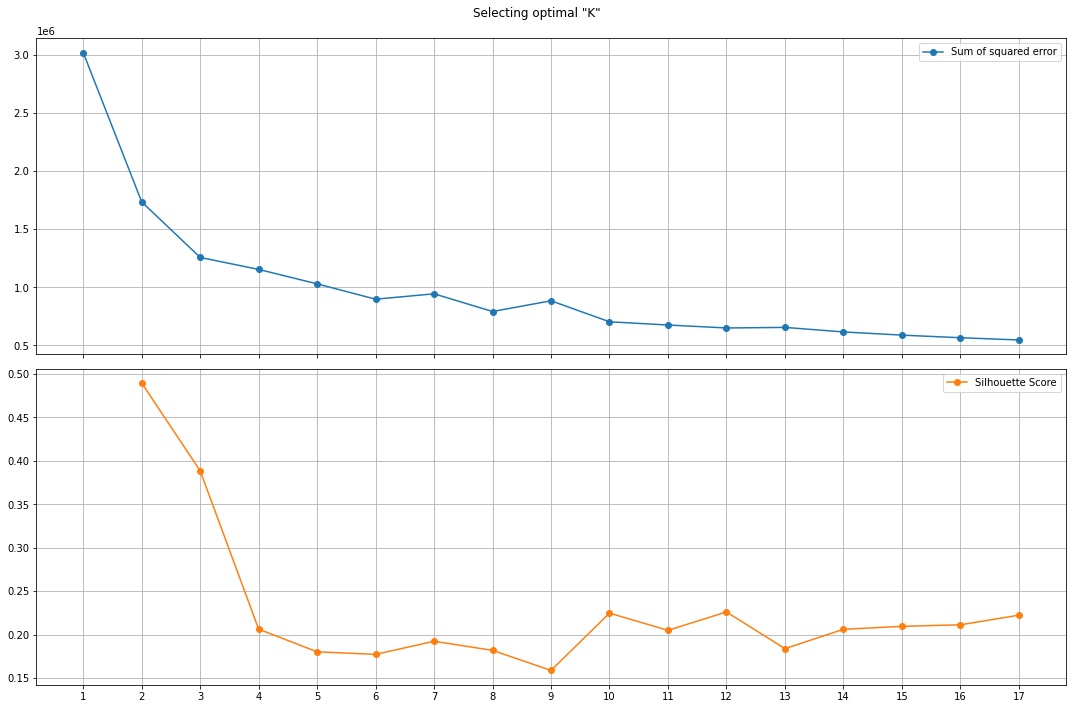

In [ ]:
report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

El $k$ adecuado corresponde con $k = 3$. Esto teniendo en cuenta el método del elbow y lo métrica de la silueta.

### Clustering con KMeans

In [18]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k,
                max_iter=500,
                random_state=42).fit(cosines)
kmeans.labels_

array([2, 0, 2, ..., 2, 2, 2])

In [19]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(cosines)
X = pca.transform(cosines)

In [20]:
np.unique(kmeans.labels_)

array([0, 1, 2])

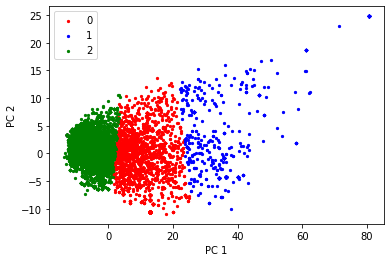

In [38]:
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for g in np.unique(kmeans.labels_):
    ix = np.where(kmeans.labels_ == g)
    plt.scatter(X[ix,0], X[ix,1], c = cdict[g], label = g, s = 5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()


Seleccionamos n muestras aleatorias para cada cluster con el fin de conocer cual es la tendencia de opinion de cada uno.

In [67]:
import random
test_tweets_nparray = np.array(test_tweets)
rand_sample = {0:[], 1:[], 2:[]}

# Seleccionamos n muestras aleatorias de cada cluster
n = 5
for g in np.unique(kmeans.labels_):
    ix = np.where(kmeans.labels_ == g)
    ix = list(ix[0])
    ix_rand = random.sample(ix, n)
    rand_sample[g].append(test_tweets_nparray[ix_rand])

In [68]:
rand_sample

{0: [array(['rt 2 the Vegan registrar admitted that “savoury petro incited his electoral witnesses to pressure voting jurors to misfill the boxes of the forms and 14 on March 13”',
         'rt that little girl looks like the petro daughter',
         'rt murderous violence destroys the family with microtrafficking and demands to vote for petro comes back and plays',
         'rt “murderous violence destroys the family with microtrafficking and demands to vote for petro” alvaro uribe',
         'My great-grandmother saying that petro is going to fix the country face with spiral eyes woozy face melting face yawning face is like severe shock of emotions djdjsjsjs'],
        dtype='<U1045')],
 1: [array(['Liar petro', 'petro', "petro's daughter is re pretty",
         'rt my candidate is petro-like', 'Rt 3 mandarins in 2 thousand.'],
        dtype='<U1045')],
 2: [array(['rt the expenses of the presidential campaigns petro 6 200 million and fific 398 million have been announced being the 